In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

1- reading the data set

In [3]:
data  = pd.read_csv('credit_card.csv', header=1)

2- extracting BILL_AMT1 to BILL_AMT6 and then summing columns<br>
create a new dataset from LIMIT_BAL and BILL_TOTAL

In [4]:
data['BILL_TOTAL'] = data.loc[:, 'BILL_AMT1':'BILL_AMT6'].sum(axis=1)
df = data[['LIMIT_BAL', 'BILL_TOTAL']]

3- applying z-score (standardization) on new dataset<br>
z = (x - μ) / σ <br>
μ = mean <br>
σ = standard deviation

In [5]:
μ = df.mean()
σ = df.std()
df = (df - μ) / σ

extracting first and second columns

In [6]:
x1, x2 = df.loc[:, 'BILL_TOTAL'], df.loc[:, 'LIMIT_BAL']

plotting dataset

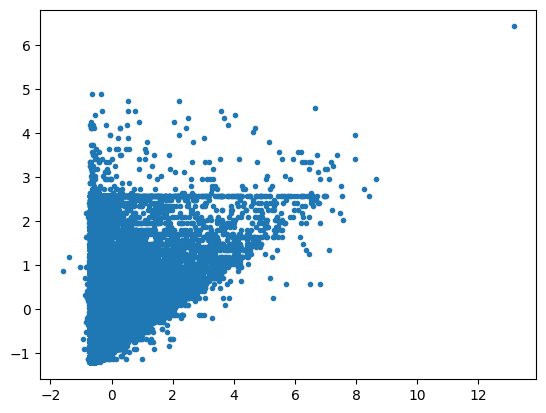

In [7]:
plt.plot(x1, x2, '.')

defining color names for clusters

In [8]:
colors = ['pink', 'orange', 'g', 'r', 'c', 'm', 'y', 'b', 'Brown', 'ForestGreen']

clustering the dataset samples, from c = 2 to 10 

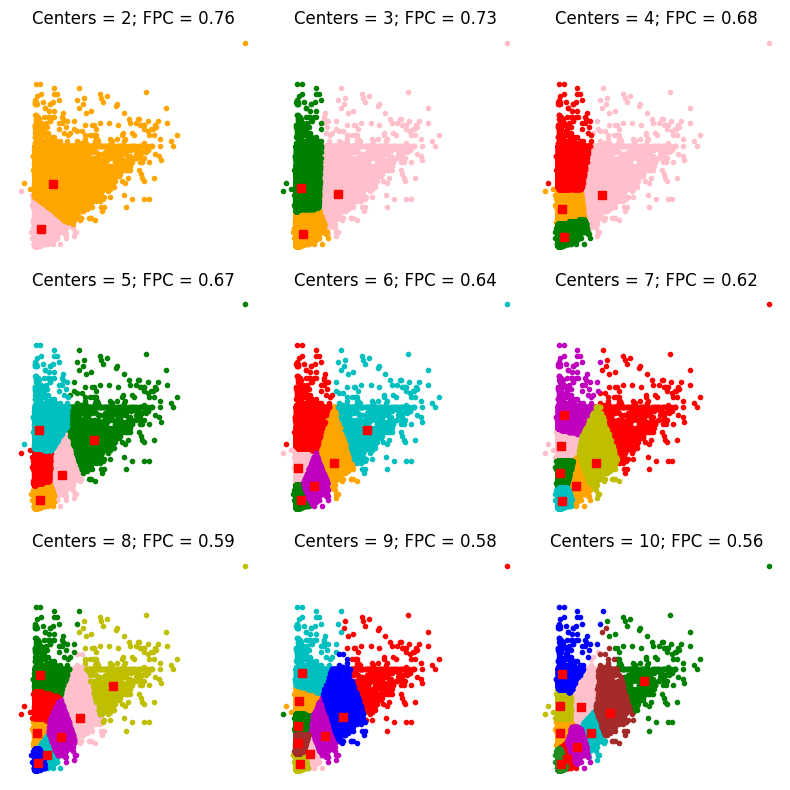

In [9]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((x1, x2))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(x1[cluster_membership == j],
                x2[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

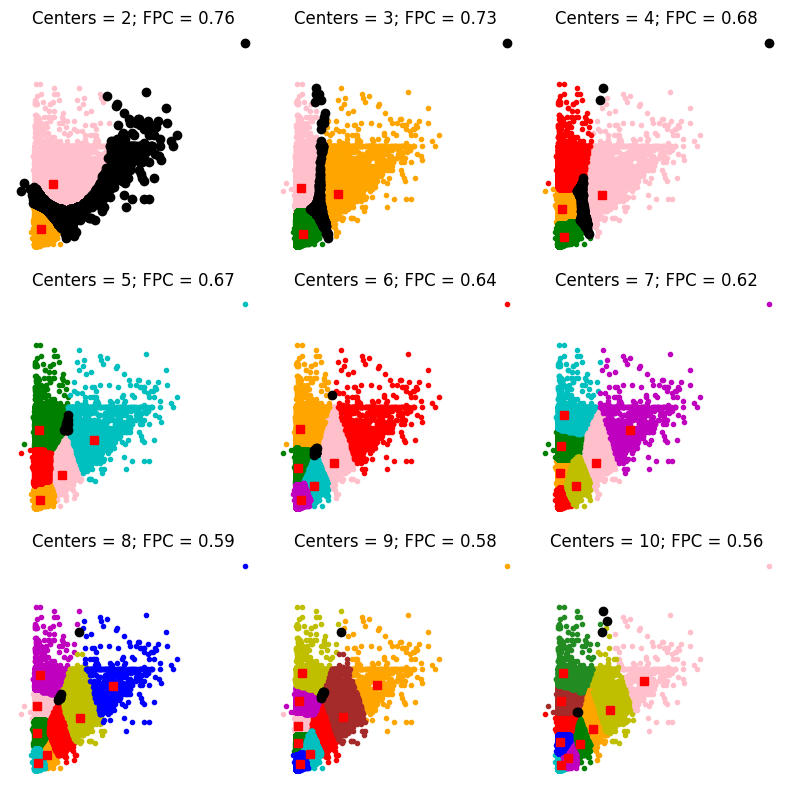

In [10]:

# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
fpcs = []
alldata = np.vstack((x1, x2))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
       alldata , ncenters, 2, error=0.005, maxiter=10000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)
    
    tt = 1 / ncenters * 1.2 + 0.05
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(alldata[0, cluster_membership == j],
                alldata[1, cluster_membership == j], '.', color=colors[j])

    list_of_border_patterns = []
    index = 0
    for item in u.T:
        if max(item) < tt:
            ax.plot(alldata[0, index],alldata[1, index],'o',color='black')

        index += 1

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

Best FPC: for 2 clusters


Text(0, 0.5, 'FCP')

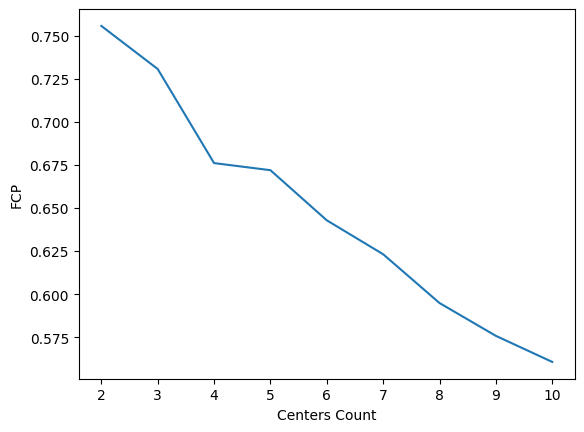

In [11]:
print(f'Best FPC: for {np.argmax(fpcs) + 2} clusters')
fig, ax = plt.subplots()
ax.plot(np.arange(2, 11), fpcs)
ax.set_xlabel('Centers Count')
ax.set_ylabel("FCP")

In [12]:
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata , 2, 2, error=0.005, maxiter=10000, init=None)
tt = 0.5 * 1.2 + 0.05
ls_preds = []
for i in range(len(u[0])):
    ls_preds.append([np.argmax(u[:, i])] if np.max(u[:, i])>tt else [0, 1])
data['class_assigend'] = ls_preds

In [13]:
df = data[['default payment next month','class_assigend']]
df

,default payment next month,class_assigend
0,1,[0]
1,1,[0]
2,0,[0]
3,0,[0]
4,0,[0]
...,...,...
29995,0,[1]
29996,0,[0]
29997,1,[0]
29998,1,[0]


In [17]:
n = 0
for i, row in df.iterrows():
  dpnm = row[0]
  ca = row[1]
  
  if len(ca) == 1 and dpnm == ca[0]:
    n += 1

print(f'They are the same in {n/len(df.index)*100}% of times')

They are the same in 48.65% of times
